In [1]:
import json
import requests
import urllib.request
import geopandas as gpd
from geopandas import GeoDataFrame
import pandas as pd
import fiona
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from shapely.geometry import Point
import mplleaflet

In [2]:
response = requests.get('https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&minmagnitude=6.0&orderby=time&limit=1000')

In [3]:
print(response.status_code)

200


In [4]:
live_eq = response.content

In [5]:
## API site: https://earthquake.usgs.gov/fdsnws/event/1/#format-geojson

url = 'https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&orderby=time&limit=1000'
request = requests.get(url)
b = bytes(request.content)
with fiona.BytesCollection(b) as f:
    crs = f.crs
    gdf = gpd.GeoDataFrame.from_features(f, crs=crs)
    print(gdf.head(20))

   alert  cdi      code                                             detail  \
0         0.0  37823535  https://earthquake.usgs.gov/fdsnws/event/1/que...   
1         0.0  37823527  https://earthquake.usgs.gov/fdsnws/event/1/que...   
2         0.0  00614421  https://earthquake.usgs.gov/fdsnws/event/1/que...   
3         0.0  72935566  https://earthquake.usgs.gov/fdsnws/event/1/que...   
4         0.0  80273344  https://earthquake.usgs.gov/fdsnws/event/1/que...   
5         3.1  1000bmkc  https://earthquake.usgs.gov/fdsnws/event/1/que...   
6         0.0  80273339  https://earthquake.usgs.gov/fdsnws/event/1/que...   
7         0.0  61997501  https://earthquake.usgs.gov/fdsnws/event/1/que...   
8         0.0  17483241  https://earthquake.usgs.gov/fdsnws/event/1/que...   
9         0.0  17483235  https://earthquake.usgs.gov/fdsnws/event/1/que...   
10        0.0  72935561  https://earthquake.usgs.gov/fdsnws/event/1/que...   
11        0.0  72935556  https://earthquake.usgs.gov/fdsnws/even

In [8]:
eq_df = gdf
eq_df.to_csv('/Users/Justin/Code/data-question-3-xtreme-united/eq_api_return.csv')

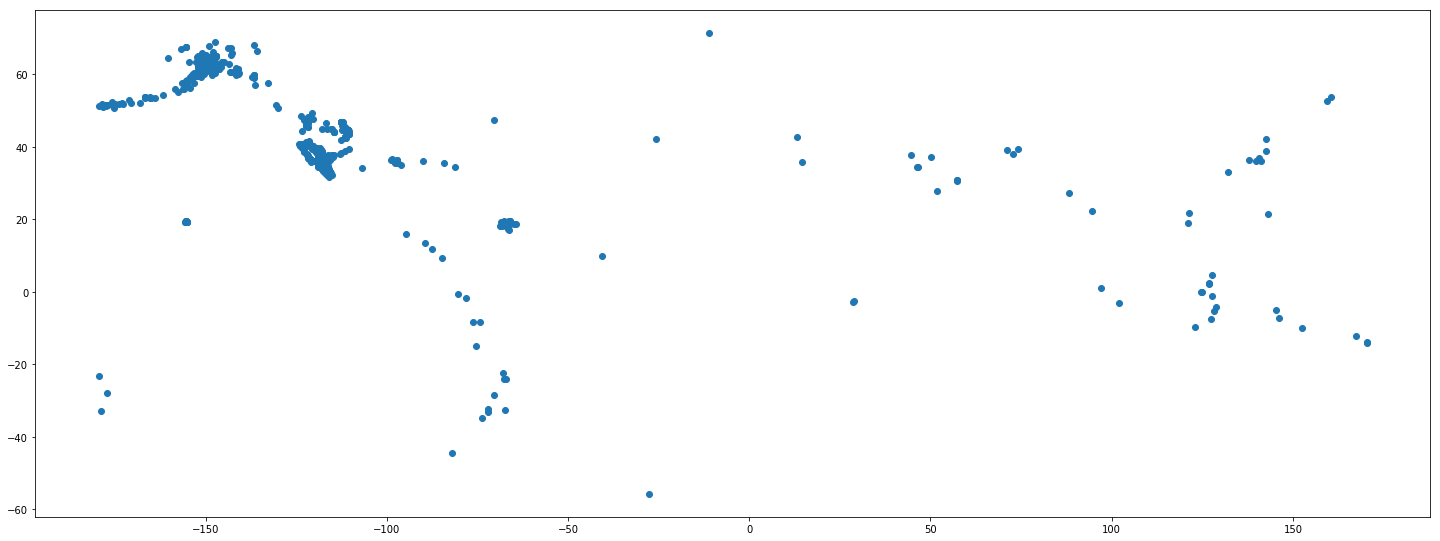

In [9]:
pylab.rcParams['figure.figsize'] = 25, 25

eq_df.plot()
plt.show()

In [ ]:
world = gpd.GeoDataFrame.from_file('/Users/Justin/Code/data-question-3-xtreme-united/world.shp')

In [ ]:
# pylab.rcParams['figure.figsize'] = 25, 25
# base = world.plot(color='black', edgecolor='grey')

# eq_df.plot(ax=base, marker='o', column ='mag', cmap = 'autumn', markersize=7);

In [ ]:
# plt.show()

In [10]:
top_eq = pd.DataFrame.from_csv('/Users/Justin/Code/data-question-3-xtreme-united/eq_df.csv')

In [11]:
top_eq.head()

,origin,country,lat,long,depth_km,magnitude,sec_effects,shaking_death,pde_total,utsu_total,em_total,other_deaths,deaths
1,1900-05-11 17:23,Japan,38.7,141.1,5,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1900-07-12 06:25,Turkey,40.3,43.1,NaN,5.9,NaN,NaN,NaN,140.0,NaN,NaN,140.0
3,1900-10-29 09:11,Venezuela,11.0,-66.0,0,7.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1901-02-15 00:00,China,26.0,100.1,0,6.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1901-03-31 07:11,Bulgaria,43.4,28.7,NaN,6.4,NaN,NaN,NaN,4.0,NaN,NaN,4.0


In [12]:
geometry = [Point(xy) for xy in zip(top_eq.long, top_eq.lat)]
hist_eq_df = top_eq.drop(['long', 'lat'], axis=1)
crs = {'init': 'epsg:4326'}
gdf = GeoDataFrame(hist_eq_df, crs=crs, geometry=geometry)

In [13]:
hist_eq_df.head()

,origin,country,depth_km,magnitude,sec_effects,shaking_death,pde_total,utsu_total,em_total,other_deaths,deaths,geometry
1,1900-05-11 17:23,Japan,5,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (141.1 38.7)
2,1900-07-12 06:25,Turkey,NaN,5.9,NaN,NaN,NaN,140.0,NaN,NaN,140.0,POINT (43.1 40.3)
3,1900-10-29 09:11,Venezuela,0,7.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-66 11)
4,1901-02-15 00:00,China,0,6.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (100.1 26)
5,1901-03-31 07:11,Bulgaria,NaN,6.4,NaN,NaN,NaN,4.0,NaN,NaN,4.0,POINT (28.7 43.4)


In [14]:
pylab.rcParams['figure.figsize'] = 25, 25
base = world.plot(color='black', edgecolor='grey')

eq_df.plot(ax=base, marker='o', column ='mag', cmap = 'autumn', markersize = 7);
# hist_eq_df.plot(ax=base, marker='*', color = 'blue', markersize = 10);
# ax.set_axis_off()
# f.suptitle('Last 1000 earthquakes with magnitude > 6')

mplleaflet.show()

NameError: name 'world' is not defined

In [15]:
eq_df.plot(marker='o', column ='mag', cmap = 'autumn', markersize = 10);
# hist_eq_df.plot(marker='*', color = 'blue', markersize = 10);
# ax.set_axis_off()
# f.suptitle('Last 1000 earthquakes with magnitude > 6')

mplleaflet.show()